# Importing Important Libaries used in this study

In [1]:
#Import all important libary for this analysis
#A standard data science library
import pandas as pd
#Used for correlation heat map
import seaborn as sns
#Used to perform some more functionalist and manipulations
import numpy as np
#Used for plotting graphs
import matplotlib.pyplot as plt
#Used for regex pattern which is called in the labmba expression to extract lsoa name into a new column
import re

# Reading the data set 

In [2]:
# Read the SPSS Merged Median house price dataset which is available on my drive
#This data already contains no missing value and part of the preprocessing has been done in spss
df = pd.read_csv("Dataset/MergedMedianHousePrice_Deprivation_Compact1_NonMissing.csv",header=0,delimiter=',')
#This is very important as we will use it to correct outliers , we create a new column storing the LSOA name. 
#This would essentianly enable us group by LSOA i.e to find the Median value of any feature of Lsoa name = 'City of London'
df['LSOAname_'] = df['LSOAname'].apply(lambda x: re.split(r'\d', x)[0].strip())
# stores unique lsoa name into an array
lsoa_names = df['LSOAname_'].unique()
# view te first 5 rows of the data frame to ensure everything is okay
df.head()


,LSOAcode2011,LSOAname,YearendingDec1995,YearendingDec1996,YearendingDec1997,YearendingDec1998,YearendingDec1999,YearendingDec2000,YearendingDec2001,YearendingDec2002,...,LivingEnvironmentScore,IncomeDeprivationAffectingChildrenIndexIDACIScorerate,IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate,ChildrenandYoungPeopleSubdomainScore,AdultSkillsSubdomainScore,GeographicalBarriersSubdomainScore,WiderBarriersSubdomainScore,IndoorsSubdomainScore,OutdoorsSubdomainScore,LSOAname_
0,E01000001,City of London 001A,108500.0,150000.0,146000.0,169500.0,175500.0,245000.0,255450.0,297475.0,...,34.502,0.007,0.019,-2.194,0.032,-0.233,2.690,0.382,1.201,City of London
1,E01000002,City of London 001B,113500.0,122500.0,130000.0,162500.0,185000.0,240025.0,265000.0,285000.0,...,37.106,0.006,0.030,-2.054,0.034,-0.208,2.523,0.742,0.806,City of London
2,E01000003,City of London 001C,74000.0,76000.0,135000.0,121680.0,128000.0,145000.0,181750.0,206000.0,...,48.337,0.155,0.160,0.086,0.142,-0.392,3.726,0.651,1.913,City of London
3,E01000006,Barking and Dagenham 016A,68500.0,69500.0,47125.0,79000.0,83500.0,63247.5,100000.0,137500.0,...,30.477,0.156,0.210,-0.400,0.325,0.036,4.270,0.548,0.590,Barking and Dagenham
4,E01000010,Barking and Dagenham 015C,55625.0,52500.0,54500.0,60750.0,67000.0,87497.5,73000.0,121500.0,...,38.231,0.317,0.494,0.159,0.228,-0.772,6.650,0.853,0.658,Barking and Dagenham


In [3]:
#Confirm that all columns and cells are completely filled,there are no empty cells and data is in exact type
print("\nA Confirmation that all columns and cells are completely filled,there are no empty cells and data is in exact type :")
print("\nfeature_name                                numbe_of_missing_values")
print(df.isnull().sum())


A Confirmation that all columns and cells are completely filled,there are no empty cells and data is in exact type :

feature_name                                numbe_of_missing_values
LSOAcode2011                                             0
LSOAname                                                 0
YearendingDec1995                                        0
YearendingDec1996                                        0
YearendingDec1997                                        0
YearendingDec1998                                        0
YearendingDec1999                                        0
YearendingDec2000                                        0
YearendingDec2001                                        0
YearendingDec2002                                        0
YearendingDec2003                                        0
YearendingDec2004                                        0
YearendingDec2005                                        0
YearendingDec2006                             

In [4]:
#check the datatypes
print("\nDisplay data types of each features")
print(df.dtypes)


Display data types of each features
LSOAcode2011                                              object
LSOAname                                                  object
YearendingDec1995                                        float64
YearendingDec1996                                        float64
YearendingDec1997                                        float64
YearendingDec1998                                        float64
YearendingDec1999                                        float64
YearendingDec2000                                        float64
YearendingDec2001                                        float64
YearendingDec2002                                        float64
YearendingDec2003                                        float64
YearendingDec2004                                        float64
YearendingDec2005                                        float64
YearendingDec2006                                        float64
YearendingDec2007                                    

In [5]:
#Keep only required columns for this analysis
#all other years are taken away because we only want to make use of the most recent year.
columns_to_keep = ['LSOAcode2011', 'LSOAname','LSOAname_', 'YearendingDec2021', 'IndexofMultipleDeprivationIMDScore', 'IncomeScorerate', 'EmploymentScorerate', 'EducationSkillsandTrainingScore', 'HealthDeprivationandDisabilityScore', 'CrimeScore', 'BarrierstoHousingandServicesScore', 'LivingEnvironmentScore', 'IncomeDeprivationAffectingChildrenIndexIDACIScorerate', 'IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate', 'ChildrenandYoungPeopleSubdomainScore', 'AdultSkillsSubdomainScore', 'GeographicalBarriersSubdomainScore', 'WiderBarriersSubdomainScore', 'IndoorsSubdomainScore', 'OutdoorsSubdomainScore']
df = df[columns_to_keep]
column_mapping = {
    'LSOAcode2011': 'LSOACode',
    'LSOAname': 'LSOAName',
    'YearendingDec2021': 'HousePrice', 
    'IndexofMultipleDeprivationIMDScore': 'IMDScore',
    'IncomeScorerate': 'IncDepriv', 
    'EmploymentScorerate': 'EmpDepriv',  
    'EducationSkillsandTrainingScore': 'EduSklDepriv',
    'HealthDeprivationandDisabilityScore': 'HealthDepriv',
    'CrimeScore': 'CrimScore',
    'BarrierstoHousingandServicesScore': 'HousServDepriv', 
    'LivingEnvironmentScore': 'LivEnvDepriv', 
    'IncomeDeprivationAffectingChildrenIndexIDACIScorerate': 'ChildIncDepriv',
    'IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate': 'OldPplIncDepriv',
    'ChildrenandYoungPeopleSubdomainScore': 'ChildYPDepriv', 
    'AdultSkillsSubdomainScore': 'AdultSklDepriv',
    'GeographicalBarriersSubdomainScore': 'GeoBarDepriv',
    'WiderBarriersSubdomainScore': 'WiderBarDepriv',  
    'IndoorsSubdomainScore': 'IndoorDepriv',  
    'OutdoorsSubdomainScore': 'OutdoorDepriv'  
}

# Now rename the columns in the DataFrame
df.rename(columns=column_mapping, inplace=True)

# View the DataFrame
df.head()


,LSOACode,LSOAName,LSOAname_,HousePrice,IMDScore,IncDepriv,EmpDepriv,EduSklDepriv,HealthDepriv,CrimScore,HousServDepriv,LivEnvDepriv,ChildIncDepriv,OldPplIncDepriv,ChildYPDepriv,AdultSklDepriv,GeoBarDepriv,WiderBarDepriv,IndoorDepriv,OutdoorDepriv
0,E01000001,City of London 001A,City of London,840000.0,6.063,0.011,0.015,0.021,-1.918,-1.649,27.134,34.502,0.007,0.019,-2.194,0.032,-0.233,2.690,0.382,1.201
1,E01000002,City of London 001B,City of London,817500.0,6.255,0.012,0.017,0.040,-1.931,-1.692,26.358,37.106,0.006,0.030,-2.054,0.034,-0.208,2.523,0.742,0.806
2,E01000003,City of London 001C,City of London,540000.0,19.548,0.105,0.088,9.612,0.321,-0.987,31.861,48.337,0.155,0.160,0.086,0.142,-0.392,3.726,0.651,1.913
3,E01000006,Barking and Dagenham 016A,Barking and Dagenham,410000.0,22.568,0.133,0.094,14.525,-0.390,0.746,39.737,30.477,0.156,0.210,-0.400,0.325,0.036,4.270,0.548,0.590
4,E01000010,Barking and Dagenham 015C,Barking and Dagenham,200000.0,30.914,0.197,0.078,13.277,0.139,1.111,51.245,38.231,0.317,0.494,0.159,0.228,-0.772,6.650,0.853,0.658


In [6]:
#Lets start by simply grouping our column names so we can access them easily at any point in time.
allFeatures = [] # : all features would be stored here
allNumericFeatures = [] # : all features to be normalized or all numeric features
featuresNormalized = [] # : all features wwill eventually be normalized into these designated columns these columns 
                            #would have _n to their names
for column in df.columns:
    if df[column].dtype == 'float64':  # Check that type is float
        #Tis feature has to be normalized
            featuresNormalized.append(column+"_n")
            allNumericFeatures.append(column)

    allFeatures.append(column) #Stores all the columns or features of these dataset : wether it is old or freshly created


#I am verifying I have what into expected in my respective variables
print("\nfeatures that would be normalized ")
print(allNumericFeatures)
print("\nfeatures would be normalized into these columns : ")
print(featuresNormalized)
print("\nThese all all the features of this data set: ")
print(allFeatures)




features that would be normalized 
['HousePrice', 'IMDScore', 'IncDepriv', 'EmpDepriv', 'EduSklDepriv', 'HealthDepriv', 'CrimScore', 'HousServDepriv', 'LivEnvDepriv', 'ChildIncDepriv', 'OldPplIncDepriv', 'ChildYPDepriv', 'AdultSklDepriv', 'GeoBarDepriv', 'WiderBarDepriv', 'IndoorDepriv', 'OutdoorDepriv']

features would be normalized into these columns : 
['HousePrice_n', 'IMDScore_n', 'IncDepriv_n', 'EmpDepriv_n', 'EduSklDepriv_n', 'HealthDepriv_n', 'CrimScore_n', 'HousServDepriv_n', 'LivEnvDepriv_n', 'ChildIncDepriv_n', 'OldPplIncDepriv_n', 'ChildYPDepriv_n', 'AdultSklDepriv_n', 'GeoBarDepriv_n', 'WiderBarDepriv_n', 'IndoorDepriv_n', 'OutdoorDepriv_n']

These all all the features of this data set: 
['LSOACode', 'LSOAName', 'LSOAname_', 'HousePrice', 'IMDScore', 'IncDepriv', 'EmpDepriv', 'EduSklDepriv', 'HealthDepriv', 'CrimScore', 'HousServDepriv', 'LivEnvDepriv', 'ChildIncDepriv', 'OldPplIncDepriv', 'ChildYPDepriv', 'AdultSklDepriv', 'GeoBarDepriv', 'WiderBarDepriv', 'IndoorDepriv'

# Describing the data

In [7]:
#Describe the data
df.describe()

,HousePrice,IMDScore,IncDepriv,EmpDepriv,EduSklDepriv,HealthDepriv,CrimScore,HousServDepriv,LivEnvDepriv,ChildIncDepriv,OldPplIncDepriv,ChildYPDepriv,AdultSklDepriv,GeoBarDepriv,WiderBarDepriv,IndoorDepriv,OutdoorDepriv
count,2.800300e+04,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.00000,28003.00000,28003.000000,28003.000000,28003.000000,28003.000000
mean,3.304608e+05,18.496469,0.123967,0.105000,18.538482,-0.136062,-0.086894,20.569597,21.210415,0.158391,0.158745,-0.09915,0.28852,0.054946,-0.380617,0.008387,-0.083592
std,2.253957e+05,12.755733,0.082372,0.062715,15.623388,0.824957,0.757649,10.052030,15.840132,0.113212,0.101059,0.76696,0.10022,0.788602,2.203722,0.871230,0.821654
min,2.550000e+04,0.477000,0.005000,0.004000,0.006000,-3.329000,-2.689000,0.439000,0.151000,0.004000,0.007000,-2.86100,0.03100,-2.801000,-9.060000,-3.429000,-3.839000
25%,1.949950e+05,8.849500,0.061000,0.059000,6.515000,-0.689000,-0.624000,13.007000,8.718000,0.069000,0.082000,-0.62700,0.21700,-0.477000,-1.900000,-0.601000,-0.646000
50%,2.800000e+05,15.303000,0.101000,0.088000,14.131000,-0.138000,-0.094000,19.275000,16.804000,0.127000,0.132000,-0.10300,0.28300,0.022000,-0.507000,0.013000,-0.097000
75%,4.000000e+05,25.133000,0.169000,0.136000,26.490500,0.418000,0.443000,26.598500,30.345000,0.226000,0.213000,0.42700,0.35500,0.535500,1.064000,0.619500,0.446000
max,4.947500e+06,92.601000,0.564000,0.568000,99.500000,3.127000,2.885000,61.965000,93.352000,0.860000,0.980000,2.90600,0.66600,3.247000,6.805000,2.997000,3.212000


# Check distribution using histogram

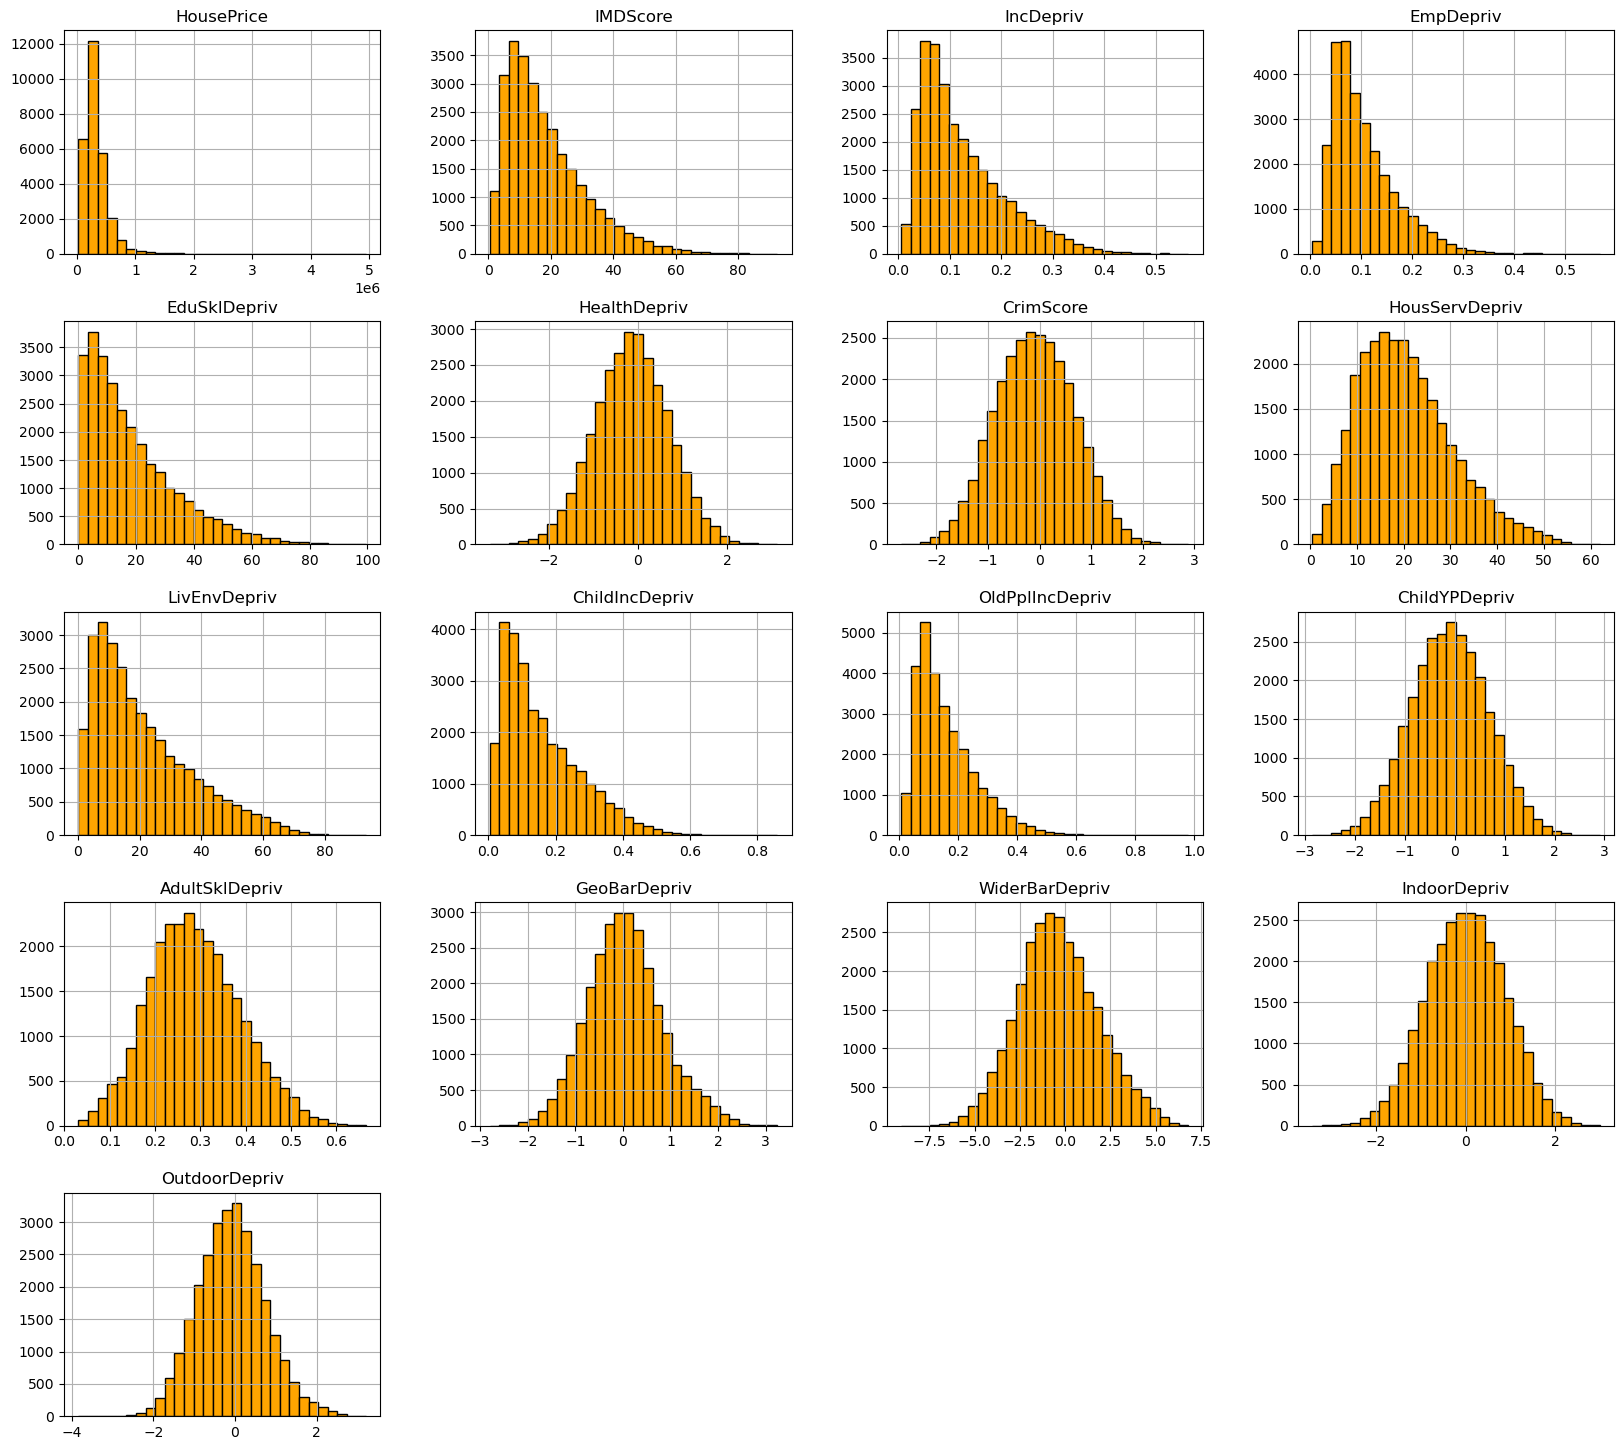

In [8]:
#we use histogram to visualize the data
#the features which dont have a normal distribution are likely to contain outliers
# from the histogram the following have oultliers YearendingDec2021', 'IndexofMultipleDeprivationIMDScore',
#'IncomeScorerate','EmploymentScorerate', 'EducationSkillsandTrainingScore','LivingEnvironmentScore',
#'IncomeDeprivationAffectingChildrenIndexIDACIScorerate','IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate
columns_to_plot = allNumericFeatures
#Now for visualization lets 
df[allNumericFeatures].hist(bins = 30, figsize = (20, 18), color = 'orange', edgecolor = 'black');


AttributeError: 'Axes' object has no attribute 'whiskers'

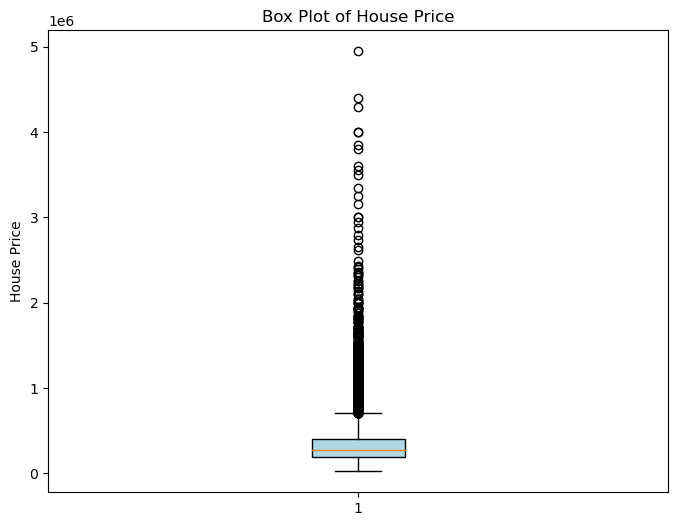

In [11]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(df['HousePrice'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of House Price')
plt.ylabel('House Price')

# Customize the color of the whiskers, caps, and fliers if desired
plt.setp(plt.gca().whiskers, color='blue')
plt.setp(plt.gca().caps, color='blue')
plt.setp(plt.gca().fliers, marker='o', markersize=5, markerfacecolor='blue', markeredgecolor='blue')

plt.show()


# Check outliers using box plot

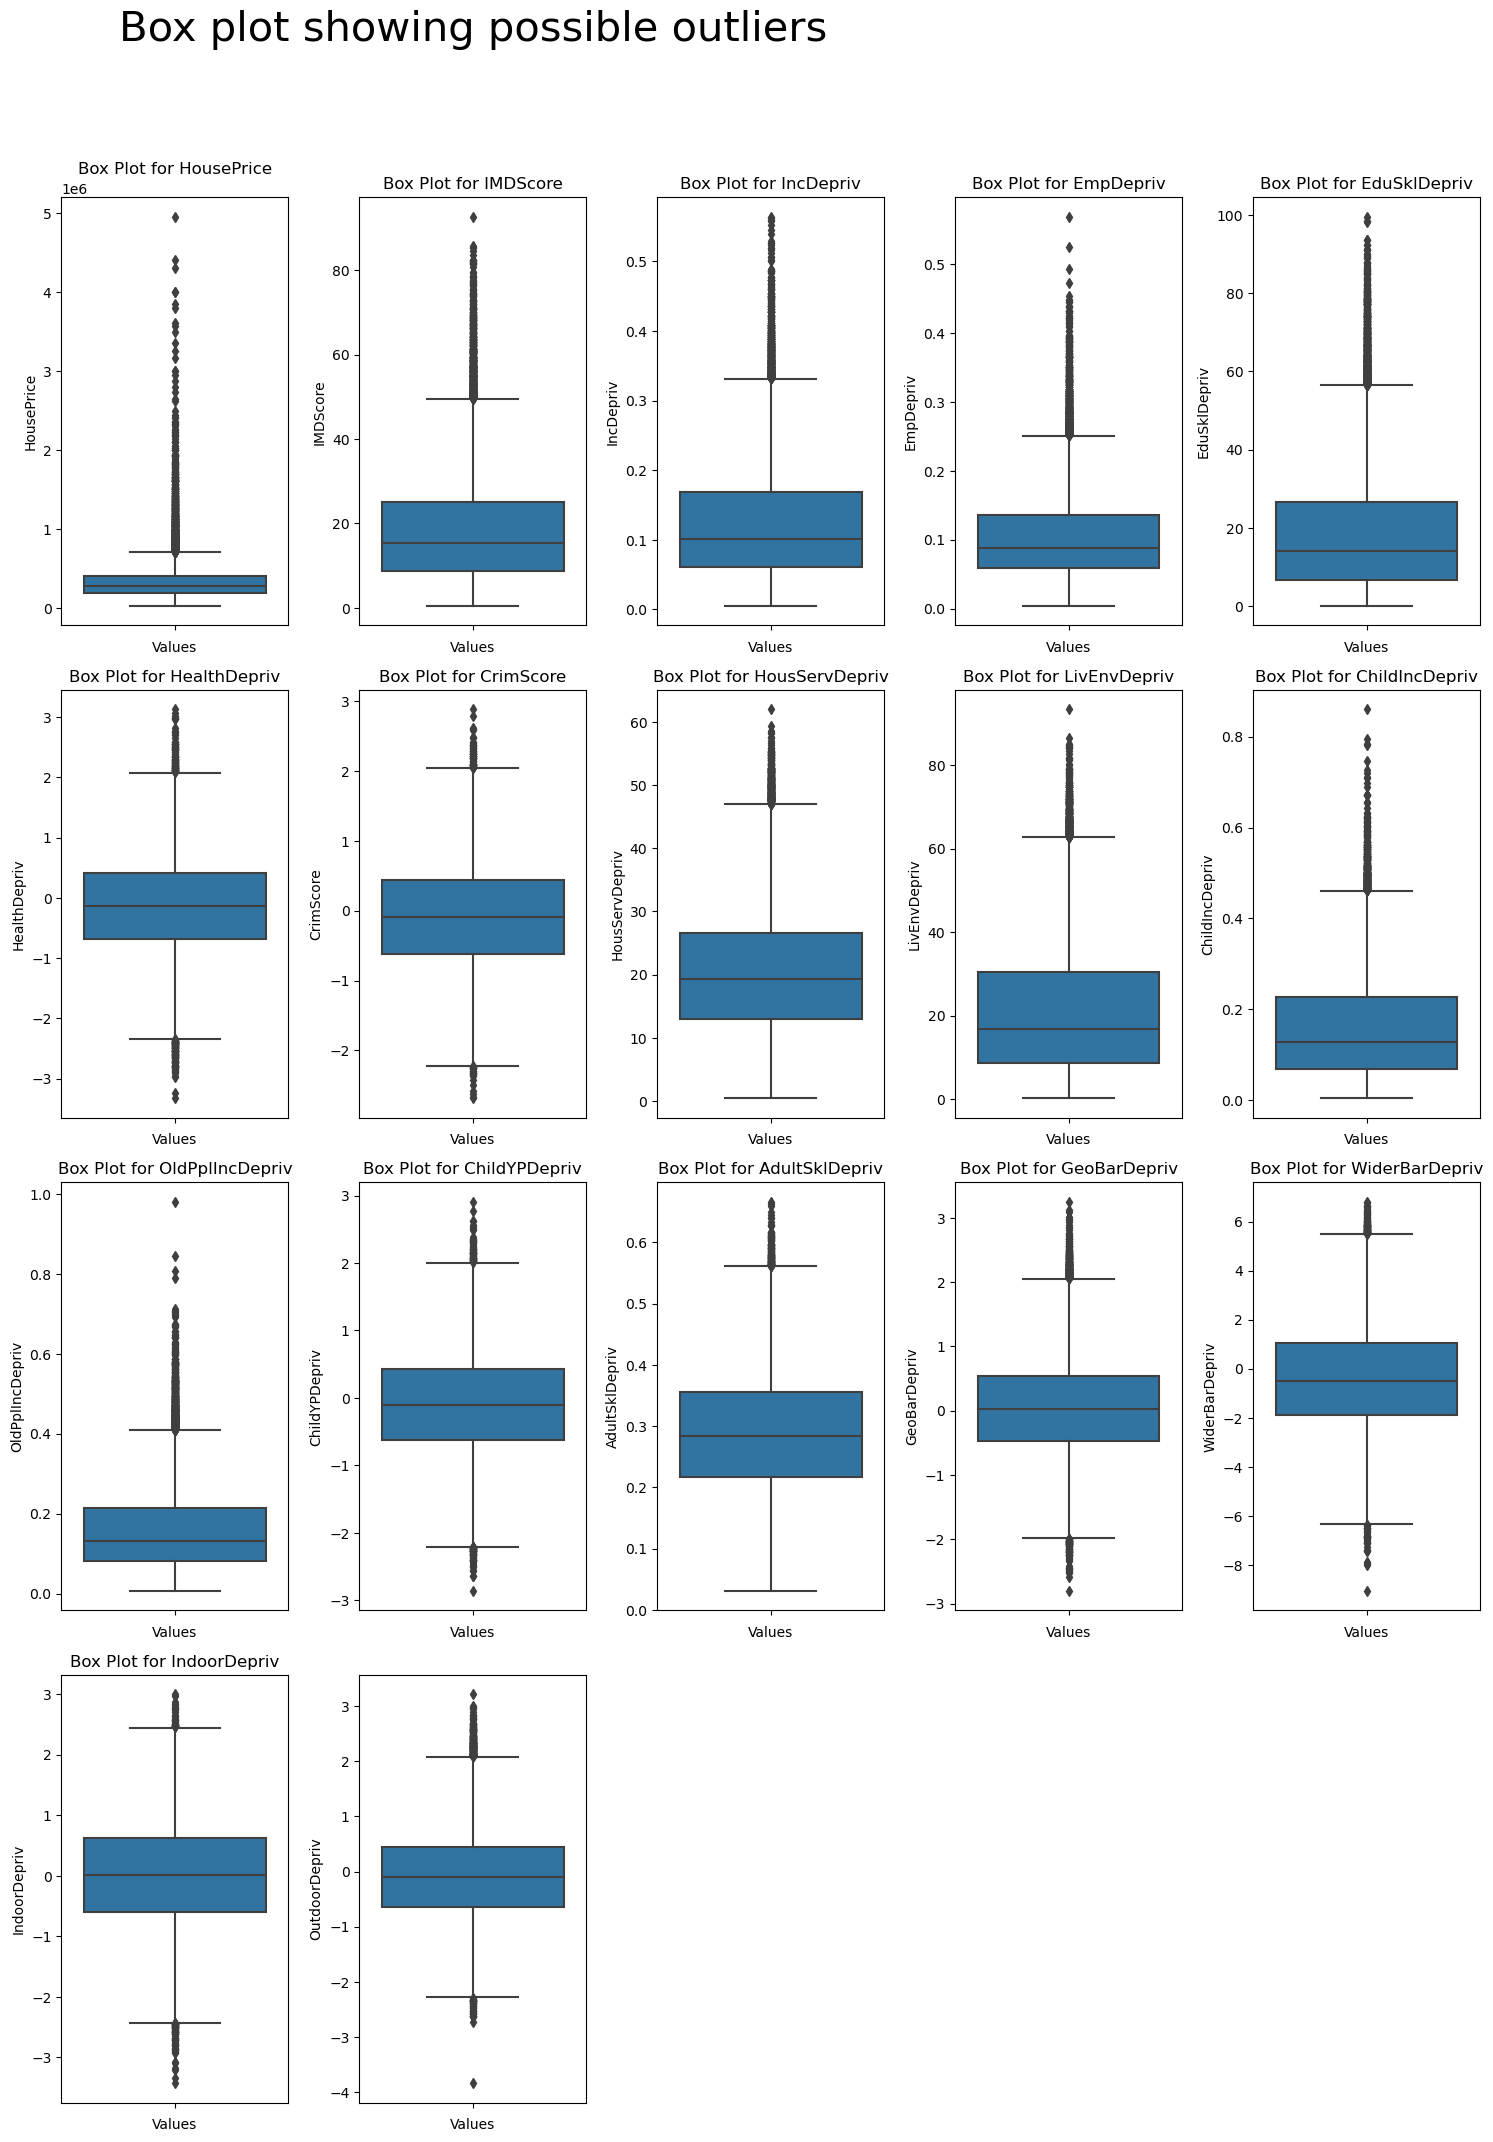

In [101]:
columns_with_outliers = allNumericFeatures

# Calculate the number of rows and columns for subplots
num_rows = 4  # You can adjust this based on the number of subplots you want per row
num_cols = len(columns_with_outliers) // num_rows + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))  # Adjust figsize if needed

# Flatten axes to make it easier to plot
axes = axes.flatten()

# Loop through the columns and create box plots
for i, column in enumerate(columns_with_outliers):
    sns.boxplot(data=df, y=column, ax=axes[i])  # Flip the box plot horizontally by setting y=column
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel(column)

# Remove any empty subplots
for i in range(len(columns_with_outliers), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.title("Box plot showing possible outliers", fontsize=30, y=4.8)
plt.show()


# Detecting outliers using the Interquartile Range IQR and replacing them with mean values - The method used here is a special type of trimmed mean 

In [102]:
# List of features
features_to_process = ['HousePrice', 'IMDScore', 'IncDepriv', 'EmpDepriv', 'EduSklDepriv', 'HealthDepriv', 
                       'CrimScore', 'HousServDepriv', 'LivEnvDepriv', 'ChildIncDepriv', 'OldPplIncDepriv', 
                       'ChildYPDepriv', 'AdultSklDepriv', 'GeoBarDepriv', 'WiderBarDepriv', 'IndoorDepriv', 'OutdoorDepriv']

def mark_outliers(dfc, ft, scale):
    Q1 = dfc[ft].quantile(0.25)
    Q3 = dfc[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - scale * IQR
    upper_bound = Q3 + scale * IQR
    
    outlier_indices = dfc.index[(dfc[ft] < lower_bound) | (dfc[ft] > upper_bound)]
    return outlier_indices

def replace_outliers_with_city_mean(dfc, ft, outlier_indices):
    for index in outlier_indices:
        # Get the LSOA name of the outlier
        lsoa_name = dfc.loc[index, 'LSOAname_']
        # compute mean value of the given feature for the lsoa name (excluding the outlier rows when computing mean)
        lsoa_mean = dfc[(dfc['LSOAname_'] == lsoa_name) & (~dfc.index.isin(outlier_indices))][ft].median()
        #set the outlier value to the new trimmed mean
        dfc.loc[index, ft] = lsoa_mean
    return dfc

# Iterate through each feature and perform outlier identification and replacement with city mean
df_no_outliers = df.copy()  # Make a copy of the original DataFrame
for feature in features_to_process:
    outlier_indices = mark_outliers(df_no_outliers, feature, 1.5)
    df_no_outliers = replace_outliers_with_city_mean(df_no_outliers, feature, outlier_indices)

# Now df_no_outliers contains the DataFrame with outliers replaced by the city mean


In [107]:
#instances where there weher no rows that fulling the condition missing values could have formed
df_no_outliers = df_no_outliers.dropna()
df_no_outliers.shape


(28002, 20)

# Now lets view the box plot after removing outliers

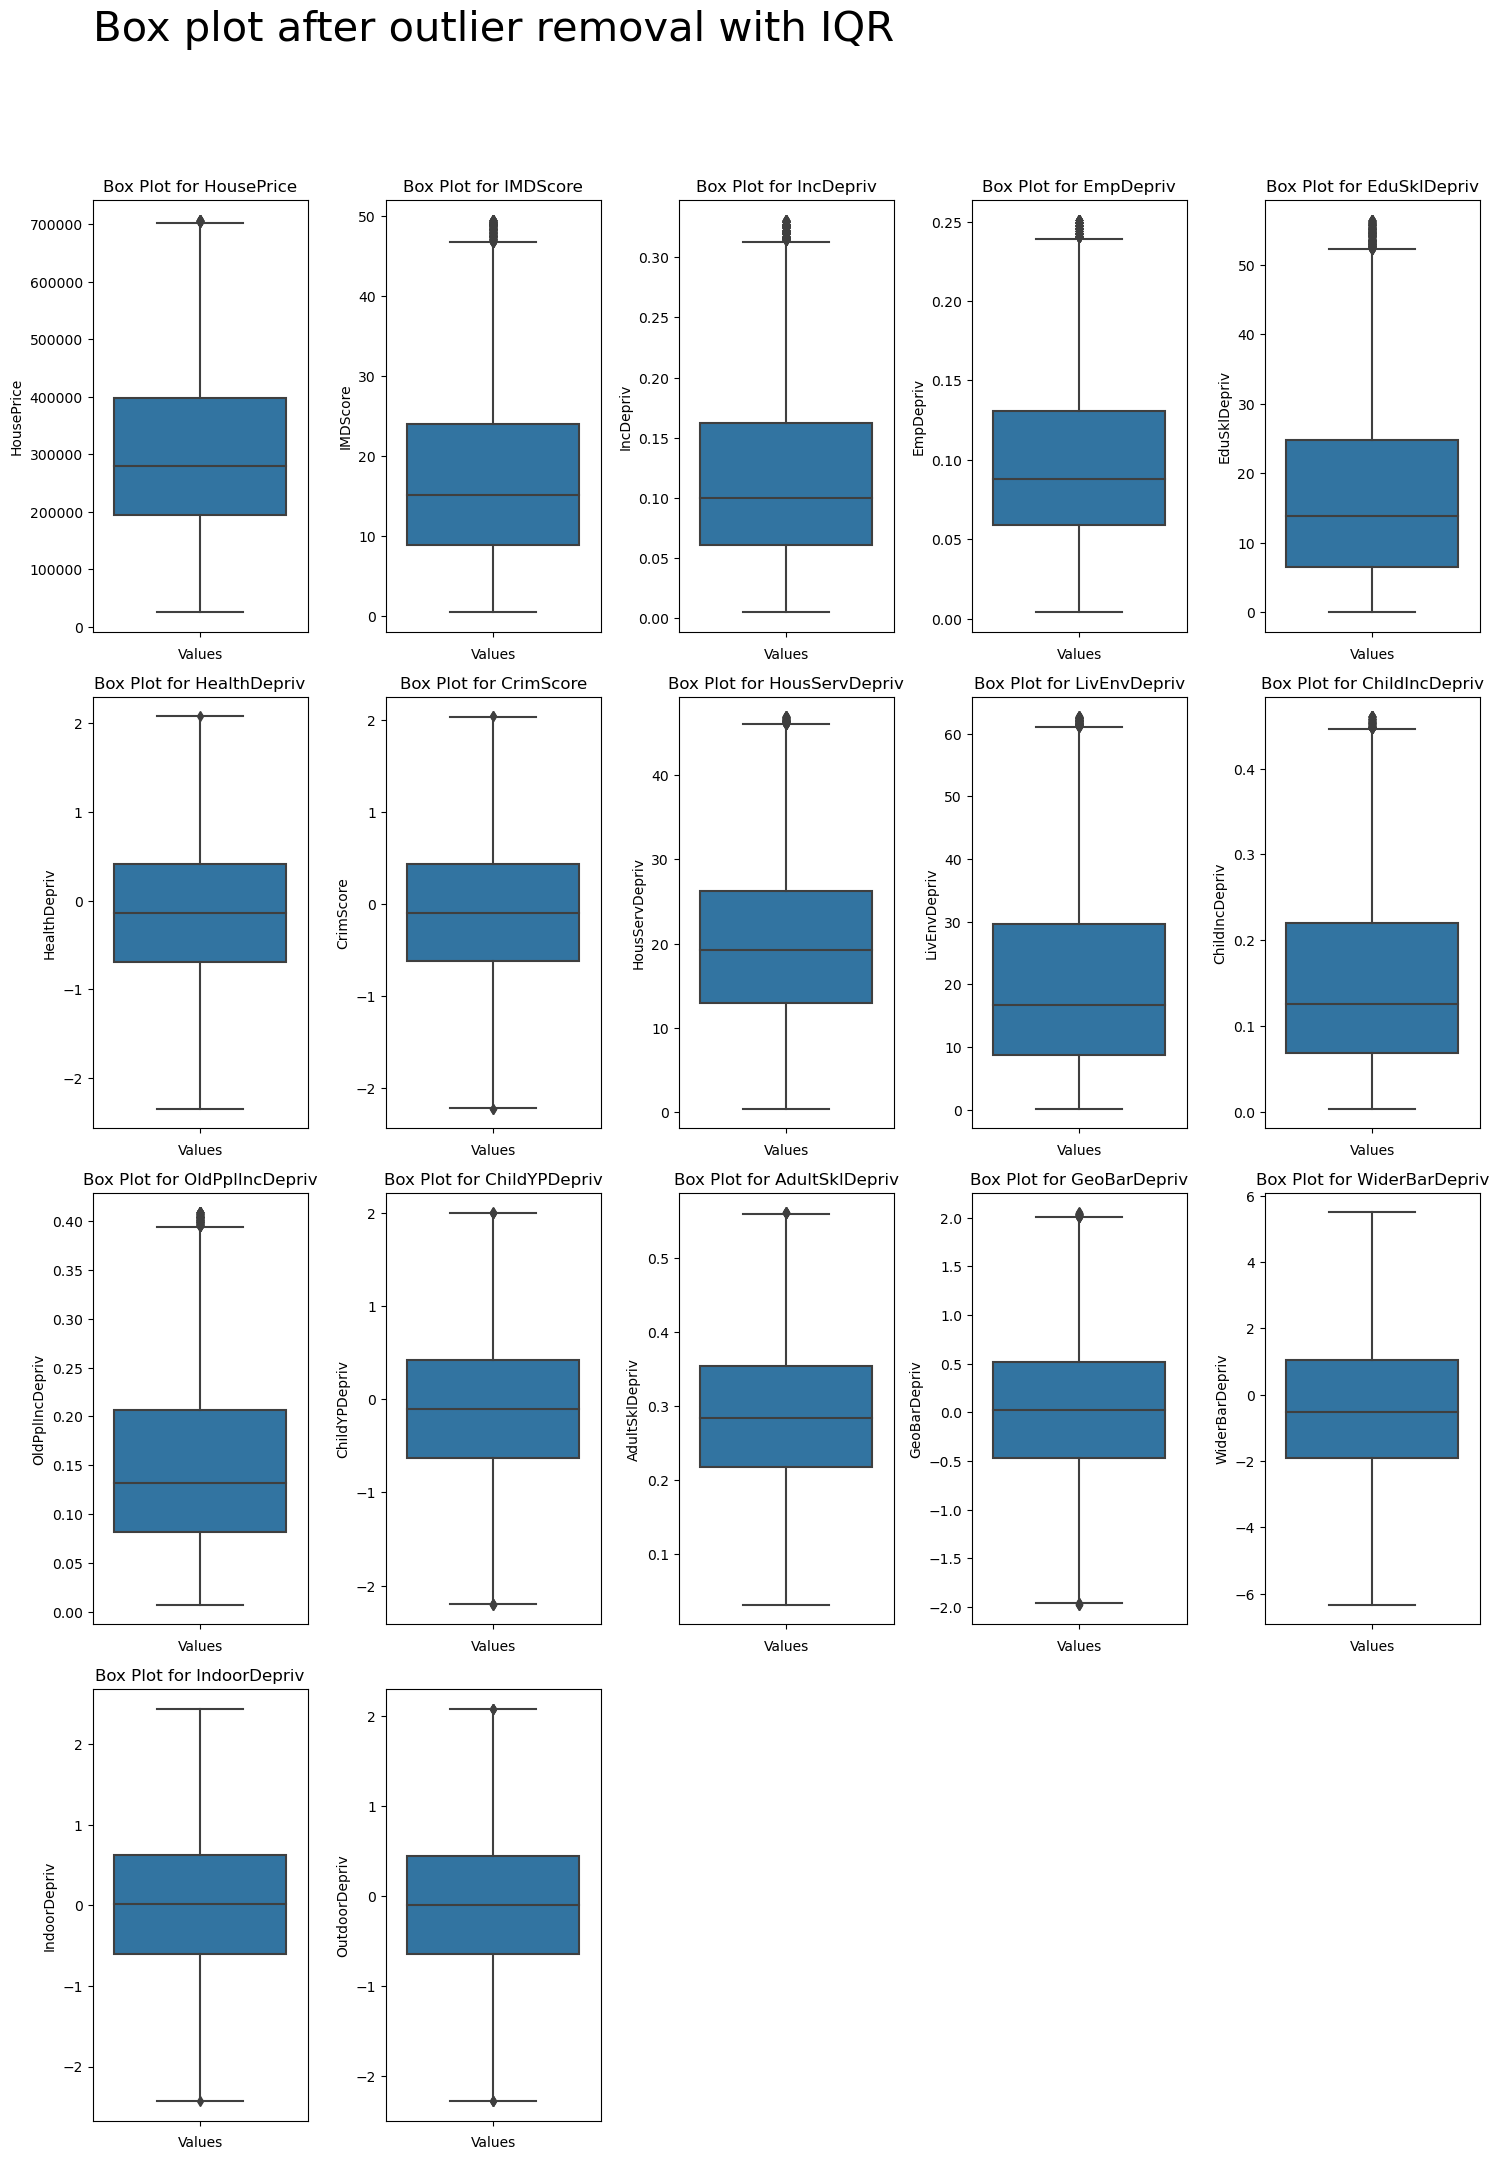

In [108]:
columns_with_outliers = allNumericFeatures

# Calculate the number of rows and columns for subplots
num_rows = 4  # You can adjust this based on the number of subplots you want per row
num_cols = len(columns_with_outliers) // num_rows + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))  # Adjust figsize if needed

# Flatten axes to make it easier to plot
axes = axes.flatten()

# Loop through the columns and create box plots
for i, column in enumerate(columns_with_outliers):
    sns.boxplot(data=df_no_outliers, y=column, ax=axes[i])  # Flip the box plot horizontally by setting y=column
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel(column)

# Remove any empty subplots
for i in range(len(columns_with_outliers), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.title("Box plot after outlier removal with IQR", fontsize=30, y=4.8)
plt.show()


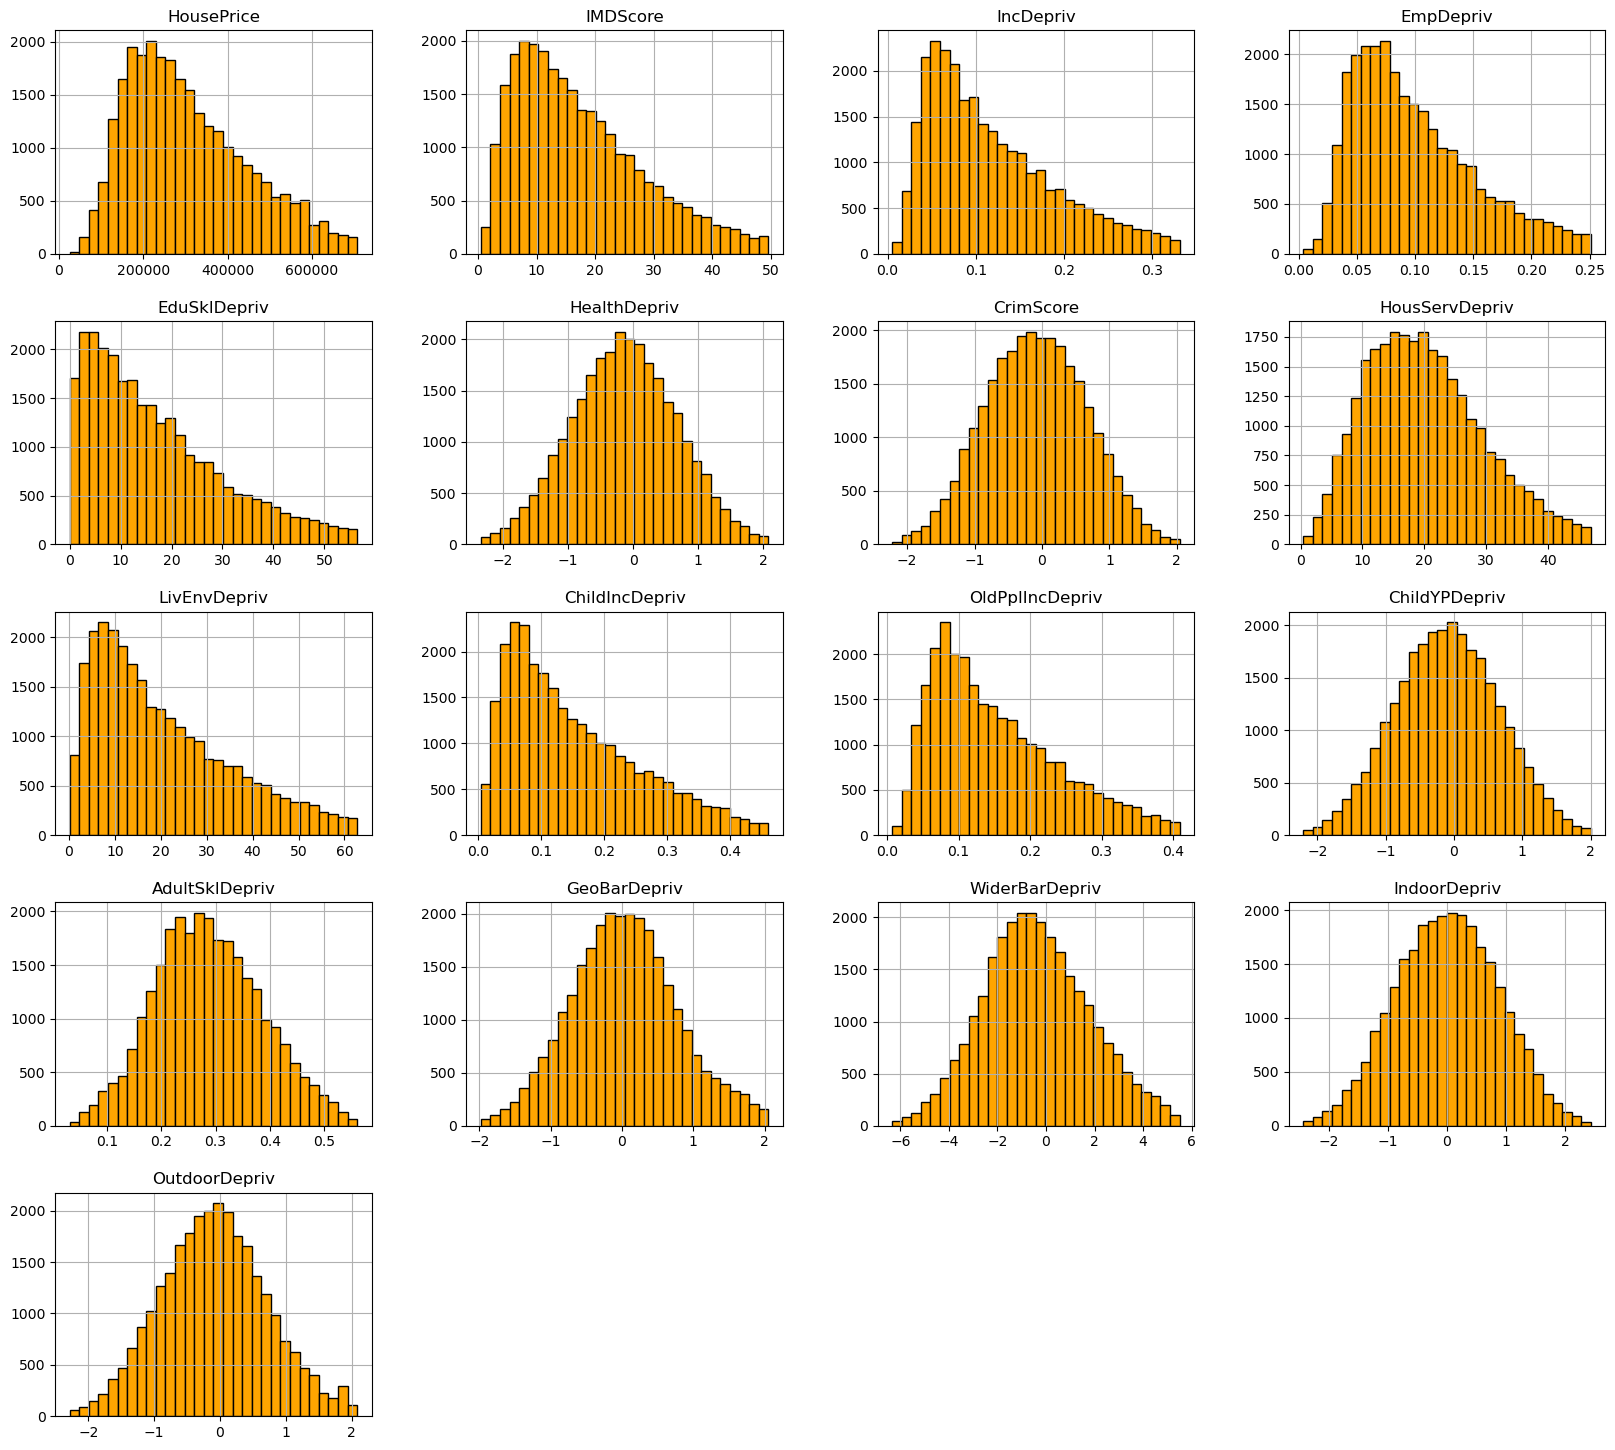

In [109]:
#we use histogram to visualize the data
#the features which dont have a normal distribution are likely to contain outliers
# from the histogram the following have oultliers YearendingDec2021', 'IndexofMultipleDeprivationIMDScore',
#'IncomeScorerate','EmploymentScorerate', 'EducationSkillsandTrainingScore','LivingEnvironmentScore',
#'IncomeDeprivationAffectingChildrenIndexIDACIScorerate','IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate
columns_to_plot = allNumericFeatures

#Now for visualization lets 
df_no_outliers[allNumericFeatures].hist(bins = 30, figsize = (20, 18), color = 'orange', edgecolor = 'black');


# Now Normalzing the data using Min-Max

In [110]:
#Normalzie all the designated features to normalize here
#When we are normalizing we want to keep the original data untouched so we normalize into a different column
dfp = df_no_outliers #where dfp is dataframe processed
dfp[featuresNormalized] = dfp[allNumericFeatures].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# Write the DataFrame to a CSV file
output_file = "Dataset/Outlierfree_normalized_data.csv"
dfp.to_csv(output_file, index=False)  #stores outlier free data in dataset folder
print("Outlier free and normalized data generated in data set folder")
print("finished preprocessing.....")
dfp.head()

Outlier free and normalized data generated in data set folder
finished preprocessing.....


,LSOACode,LSOAName,LSOAname_,HousePrice,IMDScore,IncDepriv,EmpDepriv,EduSklDepriv,HealthDepriv,CrimScore,...,HousServDepriv_n,LivEnvDepriv_n,ChildIncDepriv_n,OldPplIncDepriv_n,ChildYPDepriv_n,AdultSklDepriv_n,GeoBarDepriv_n,WiderBarDepriv_n,IndoorDepriv_n,OutdoorDepriv_n
0,E01000001,City of London 001A,City of London,583750.0,6.063,0.011,0.015,0.021,-1.918,-1.649,...,0.573728,0.548624,0.006565,0.029851,0.002850,0.001887,0.433069,0.762564,0.577563,0.797848
1,E01000002,City of London 001B,City of London,583750.0,6.255,0.012,0.017,0.040,-1.931,-1.692,...,0.557050,0.590213,0.004376,0.057214,0.036096,0.005660,0.439266,0.748458,0.651531,0.707418
2,E01000003,City of London 001C,City of London,540000.0,19.548,0.105,0.088,9.612,0.321,-0.987,...,0.675321,0.769585,0.330416,0.380597,0.544289,0.209434,0.393654,0.850072,0.632833,0.960852
3,E01000006,Barking and Dagenham 016A,Barking and Dagenham,410000.0,22.568,0.133,0.094,14.525,-0.390,0.746,...,0.844592,0.484340,0.332604,0.504975,0.428877,0.554717,0.499752,0.896022,0.611670,0.657967
4,E01000010,Barking and Dagenham 015C,Barking and Dagenham,200000.0,30.914,0.197,0.078,13.277,0.139,1.111,...,0.720755,0.608180,0.684902,0.669154,0.561624,0.371698,0.299455,0.901723,0.674337,0.673535


# Now lets understand how each variable correlate with the target variable - using the correlation heatmap

<Axes: >

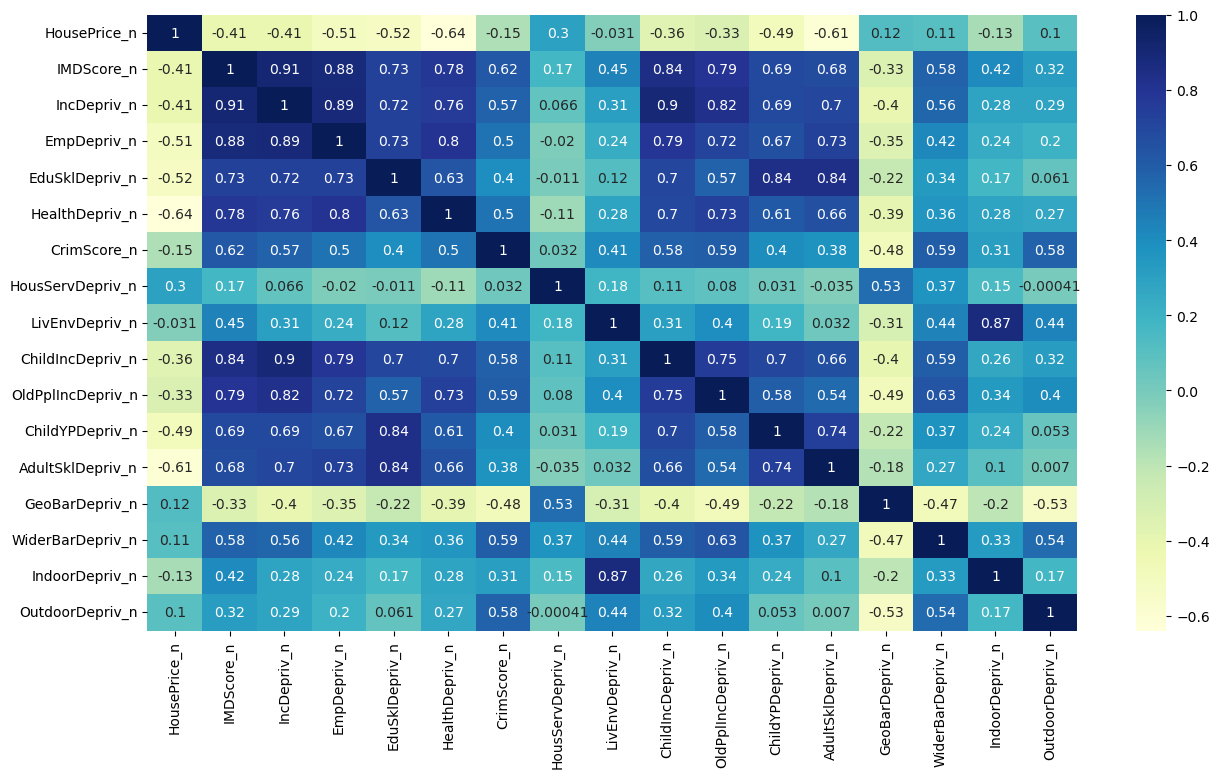

In [111]:
plt.figure(figsize=(15,8))
sns.heatmap(dfp[featuresNormalized].corr(), annot= True,  cmap="YlGnBu")